## Exercise 3

Do an exploratory data analysis of the adult dataset.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

In [2]:
#Load Dataset
adult = pd.read_csv("Datasets/adult.csv")

#Check if data loaded properly
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Check Ranodm Samples from the data
adult.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
18600,33,?,192644,HS-grad,9,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
16076,57,Private,130714,1st-4th,2,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,22,United-States,<=50K
426,36,Federal-gov,255191,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,1408,40,United-States,<=50K
23509,62,Private,266624,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,6418,0,40,United-States,>50K
22956,30,State-gov,137613,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,Taiwan,<=50K
9652,44,Private,120057,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,>50K
13255,65,Private,261334,9th,5,Widowed,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
48028,19,Private,352849,HS-grad,9,Never-married,Sales,Other-relative,Black,Female,0,1719,30,United-States,<=50K.
40833,50,Private,221532,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K.
9571,49,Local-gov,126446,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,30,United-States,<=50K


<p>Loading the dataset and inspecting the first few rows, we cleary see that the dataset contains census data as well as threir income. Key features are:
<li>Age of the individual<li>The number of years in education<li>Sex
<li>hours-per-week which the individual worked<li> income
<p>The dataset also contains other features as well, such as worcklass, occupation, relationship etc which gain more value once pre processed and encoded.  

Also by displaying random samples from the data, we can see that there are 4 categories of income, rather than 2( <=50K. & <=50K.). Also there is "?" for "workclass" and "occupations" categories.
Hence further exploratotry is needed.

In [4]:
#Check workclass unique categories
adult["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [5]:
#Check occupation unique categories
adult["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

We veify that there are values that dont make sense. So we have to decide what we aim to do with our data and how could those values affect our model. Perhaps we want to delete those rows or imputate their values with mean or median or with most occuring category.

<p>Using the pandas function info() we get a consice summary of our Dataset.
<li>We can distinguish which are the features of our dataset and how many their are.Also we can see the length of the dataset (how many rows we have)
<li>A number of their non null values. Note that, from this number we can get a first estimate of the missing values in the dataset.
<li>Finally we can see the data type of the variables.

In [6]:
#Define the variables/features of the dataset & their data type
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#Check for Missing Values
adult.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Once checking the missing values we see that there are approximatly 1000 for the workclass and the occupation and almost 300 for the native-country.
Since the missing values are very small part of the whole dataset is pretty safe to drop those values.

In [8]:
#Dorpping missing values
adult = adult.dropna()

In [9]:
#Verify that missing values were droped
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
#Check the data to see the outcomes
adult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   workclass       47621 non-null  object
 2   fnlwgt          47621 non-null  int64 
 3   education       47621 non-null  object
 4   education-num   47621 non-null  int64 
 5   marital-status  47621 non-null  object
 6   occupation      47621 non-null  object
 7   relationship    47621 non-null  object
 8   race            47621 non-null  object
 9   sex             47621 non-null  object
 10  capital-gain    47621 non-null  int64 
 11  capital-loss    47621 non-null  int64 
 12  hours-per-week  47621 non-null  int64 
 13  native-country  47621 non-null  object
 14  income          47621 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


We can see that after dropping the missing values the dataset does lose much information.

In [11]:
#Check for duplicates
adult.duplicated().sum()

np.int64(29)

In [12]:
#Explore duplicates as well
adult[adult.duplicated(keep=False)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


First we find out that ther are 29 duplicated variables. But exploring the duplicates we find out that they are not the same observations, but since the dataset is about census data, many variables will be the same, like age, occupation, marital-status etc.

Even though it is not required in this task, we are going to transform the income variable for sake of visuallization and plotting.


In [13]:
adult["income"] = adult["income"].replace({"<=50K.":"<=50K", ">50K.":">50K"})

## Visualization

<p>Visuallizing the data and analyzing the descriptive statistics of it will provide us with valueable insights. We can find out if our data needs cleaning and transormation and if so, which features of it are crucial to be transformed or cleaned. We are also going to gain a more in depth understanding of what the data is about.<p>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Categorical Descriptive Statistics
# Descriptive statistics for numerical variables
print(adult[["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]].describe())


                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  47621.000000  4.762100e+04   47621.000000  47621.000000  47621.000000   
mean      38.640684  1.897271e+05      10.090821   1091.137649     87.853489   
std       13.558961  1.055695e+05       2.568320   7487.228336    404.010612   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175840e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.782820e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.377200e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    47621.000000  
mean        40.600050  
std         12.260345  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


The dataset consists of 48 thousands rows( or individuals), with age raging between 17 and 90.

Centrality Tendencies
    <li>The mean age is 38.64 years, slighlty higher than the median (37), indicating a slightly right-skewed deistribution.
    <li>STD (13.71) suggest that that ages are spread over a relatively broad range.
    <li>The second and third interquirtiles shows that 50% of indivuals are between the age of 28 and 48.</u>

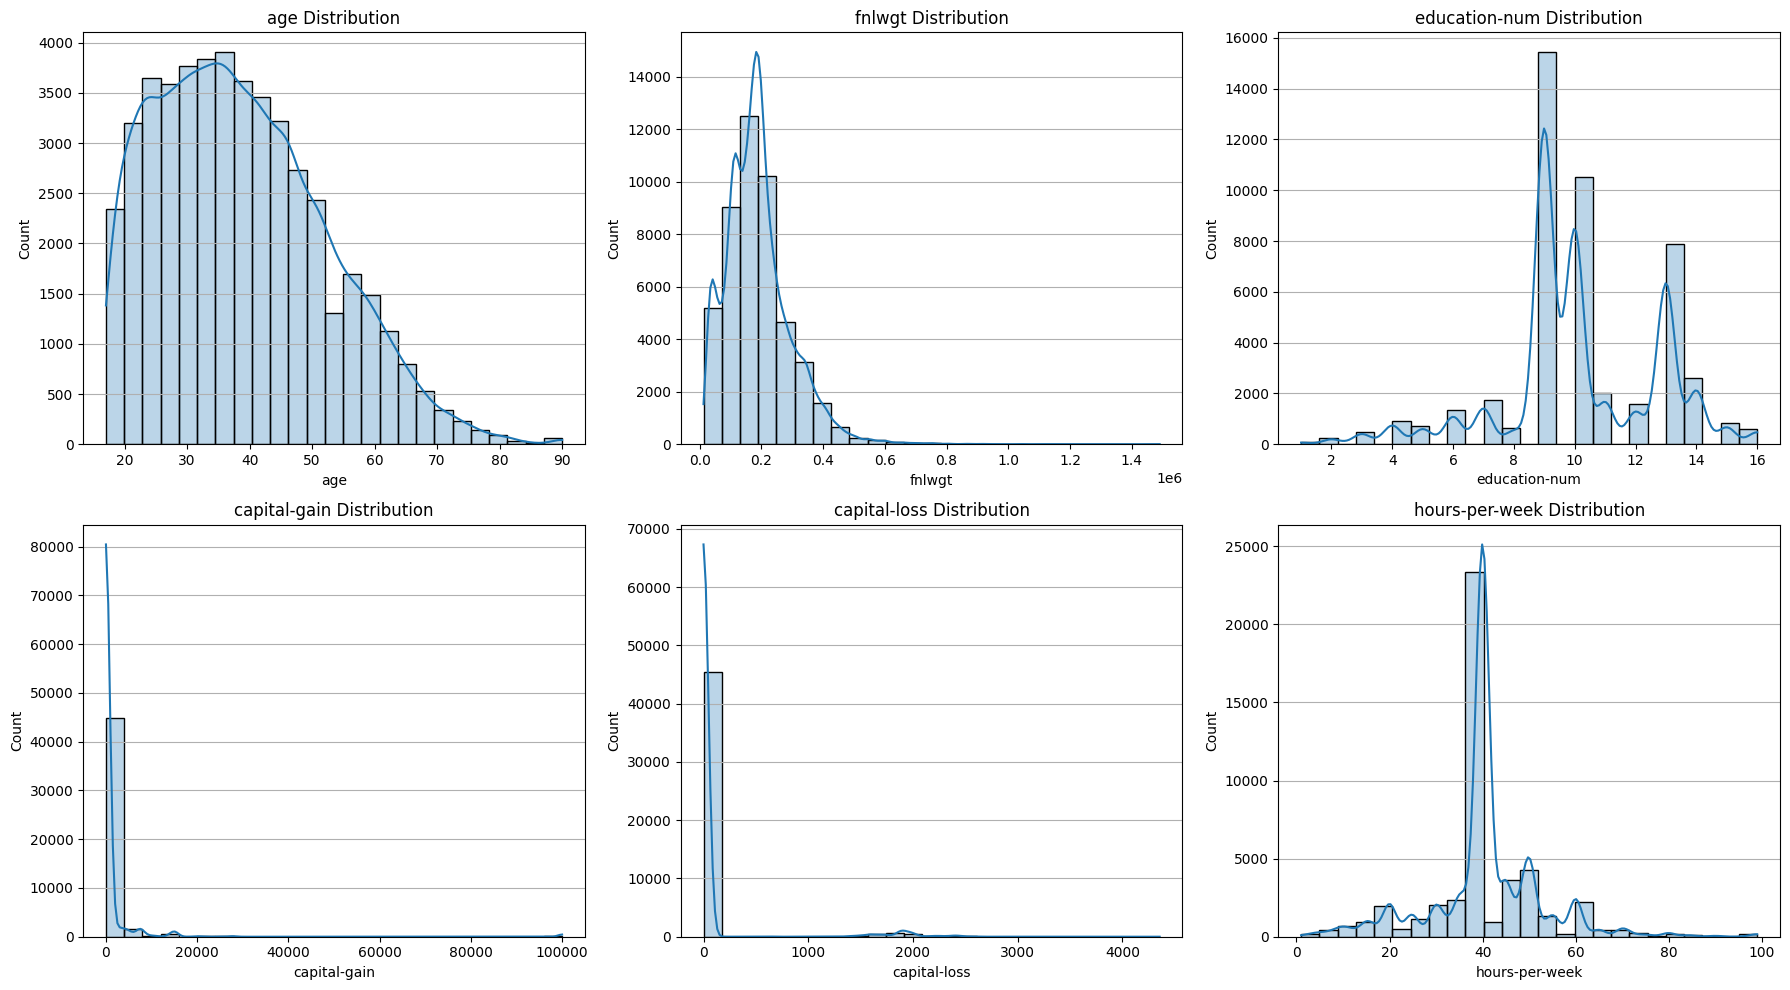

In [16]:
# Define numerical columns
numerical_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Create histograms for numerical variables
for i, col in enumerate(numerical_cols):
    sns.histplot(adult[col], bins=25, kde=True, alpha=0.3, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

Distribution 
    <li>From the histogram and the density curve(KDE) we can confirm the right skewed distribution, meaning that while most individuals are up to 50 years old, there are few older individuals.
    <li>The highest frequency of age appears between 20 and 50 years, with peaks around late 20 and late 30.
    

In [17]:
# Descriptive statistics for categorical variables
print(adult[["workclass", "education", "occupation", "relationship", "race", "native-country", "income"]].describe())


       workclass education      occupation relationship   race native-country  \
count      47621     47621           47621        47621  47621          47621   
unique         9        16              15            6      5             42   
top      Private   HS-grad  Prof-specialty      Husband  White  United-States   
freq       33717     15444            6110        19396  40786          42958   

       income  
count   47621  
unique      2  
top     <=50K  
freq    36080  


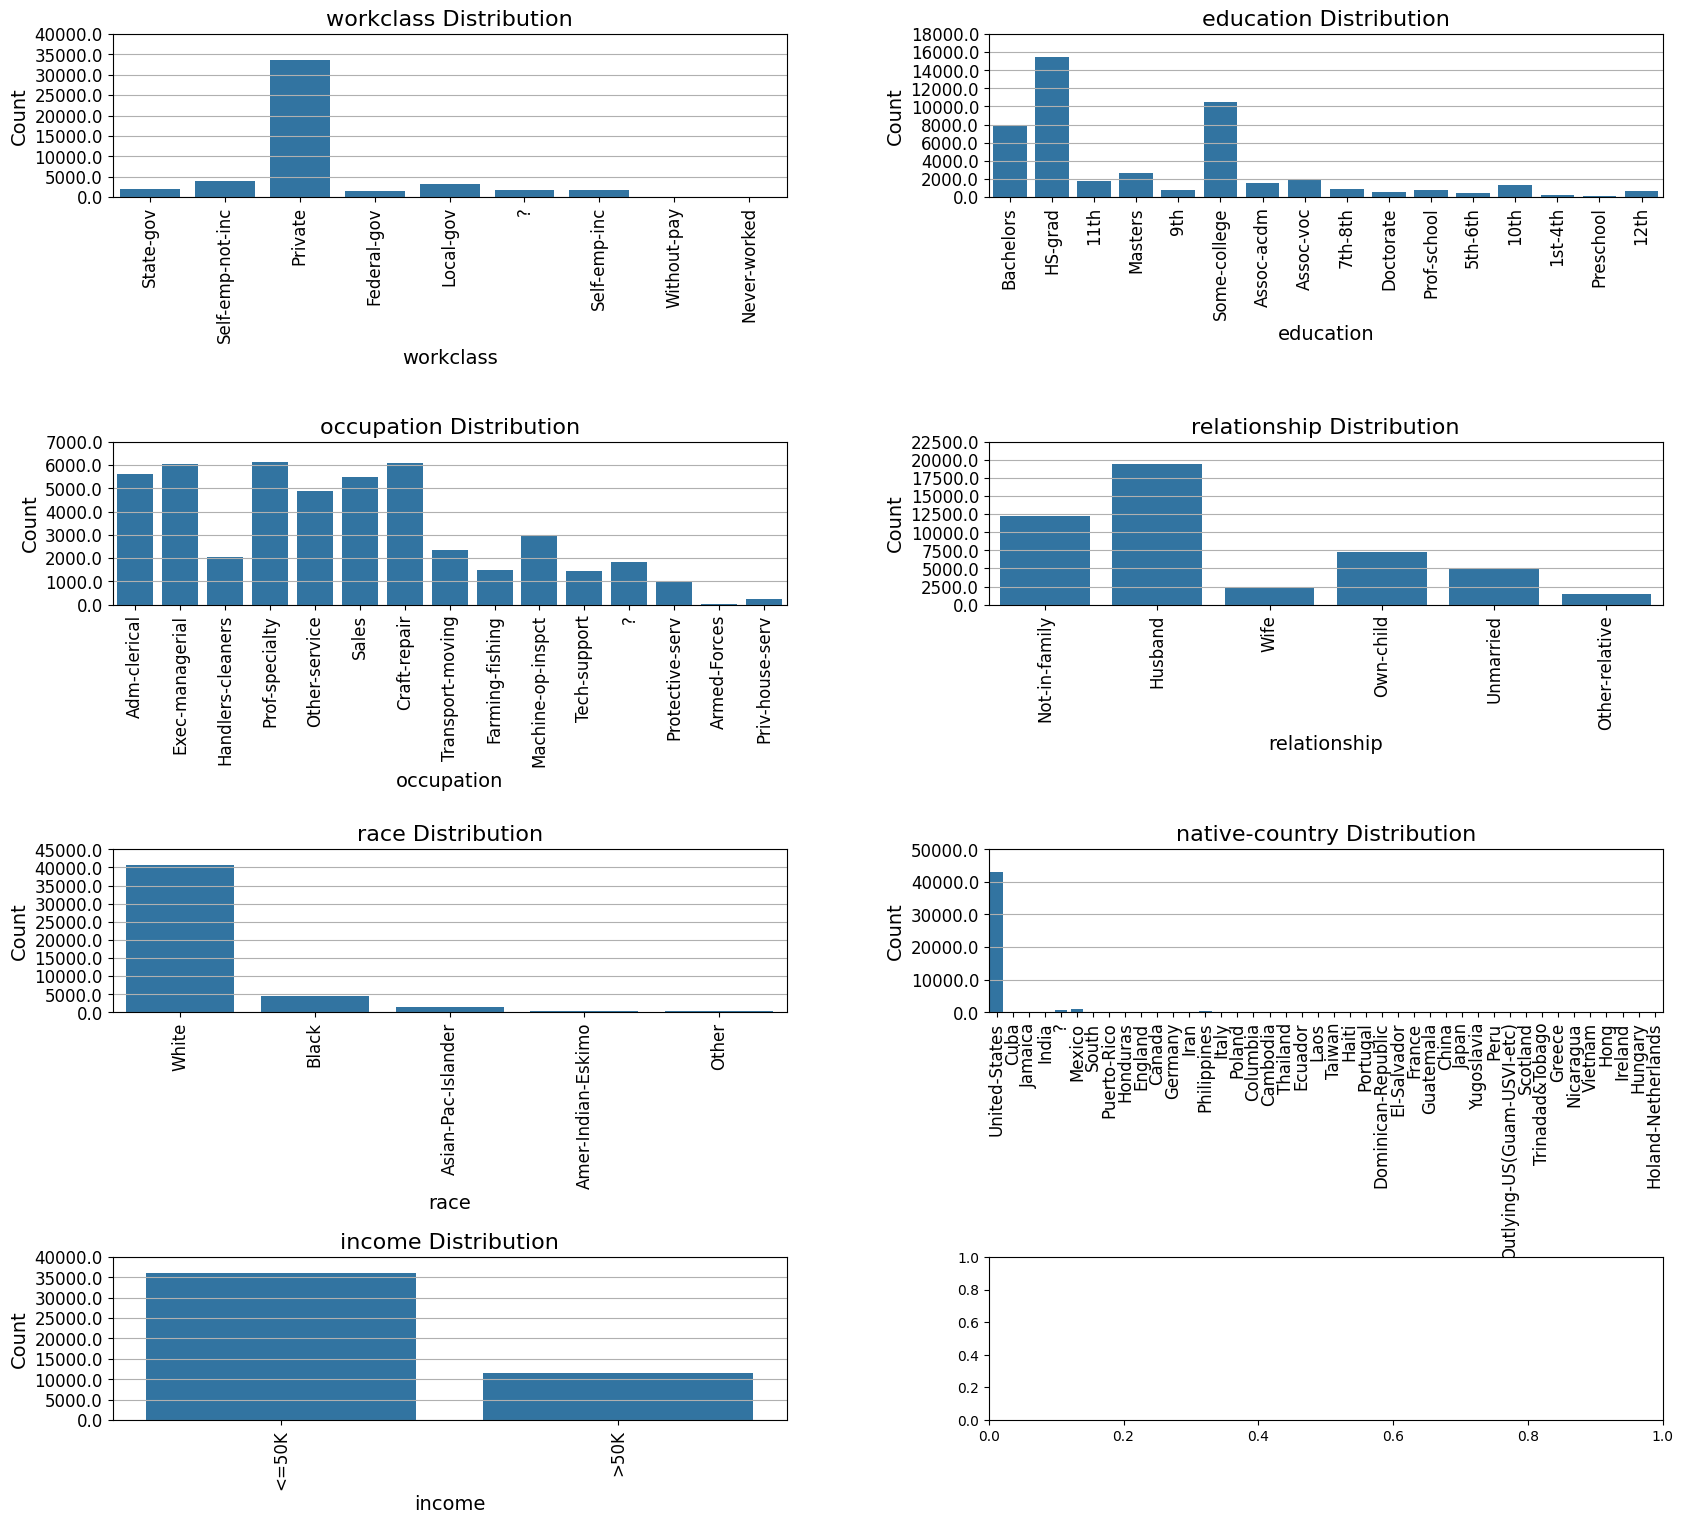

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns
categorical_cols = ["workclass", "education", "occupation", "relationship", "race", "native-country", "income"]

# Set figure size (Larger for better spacing)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 18))  # More spacing with bigger figsize
axes = axes.flatten()  # Flatten for easy iteration

# Create subplots for each categorical variable
for i, col in enumerate(categorical_cols):
    sns.countplot(data=adult, x=col, ax=axes[i])
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, fontsize=12)
    axes[i].set_yticks(axes[i].get_yticks())
    axes[i].set_yticklabels(axes[i].get_yticks(), fontsize=12)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel("Count", fontsize=14)
    axes[i].set_title(f"{col} Distribution", fontsize=16)
    axes[i].grid(axis='y')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=1.5, wspace=0.3)  # Adjust vertical (hspace) & horizontal (wspace) spacing

plt.show()


We can see that there are 9 unique categories for this feature with the cateogry with most individuals being the private sector with frequency of 33906 individuals.

From the plot we see that there is a category "?". We can either choose to drop those rows or take alternative approach and replace the "?" category with one that makes more sense like "Uknown" or choose more sophisticated approach and replace the values with neigboring categories using ML models.

Futhermore, from the plot it is not clear if the categories "Whitout-pay" and "Never-worked" have adequete number of samples if at all. Hence, further exploration is needed depending on what we aim to achieve with this dataset.

The general intepretation of the plot and the statistic is pretty much the same as the previous.
It is worth mentioning though that the "?" appears again, so further actions are needed.

From the two plots, capital-gain and capital loss, we can see that there are not many indivduals with financial assets in our dataset. From the statistics we can confidently say that 75% of the indivuals does have either income or loss.

From this distibution we can see that most of individuals work 38-40 hours per week. 75% of our observations work less than 45 hours.

There are 42 unique countries in our dataset. The top country being US with frequency of 43.832.

## Variation/Correlation between pairs of variables.

## Variation between two categorical

In [19]:
#Descriptive statistic
adult[["sex", "income"]].describe()

,sex,income
count,47621,47621
unique,2,2
top,Male,<=50K
freq,31937,36080


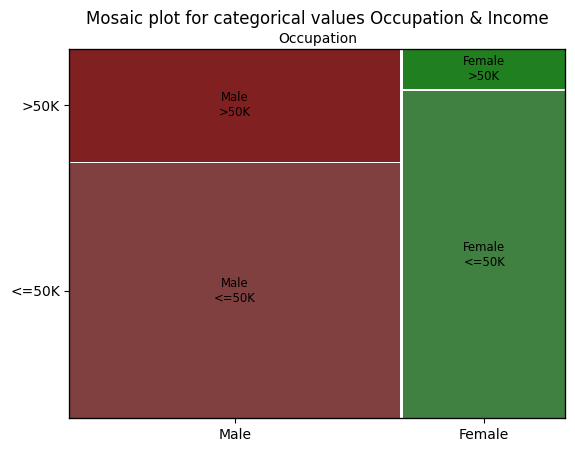

In [20]:
#Both variables are categorical
from statsmodels.graphics.mosaicplot import mosaic

mosaic(adult, ["sex", "income"])
plt.title("Mosaic plot for categorical values Occupation & Income")
plt.xlabel("Occupation")
plt.ylabel("Income")
plt.show()

From this analysis we find that the most common sex is male with 31937 occurences and the most common group of income <=50K with 36080 occurences.

A larger portion of both males and females fall into the <=50K income category, indicating that lower income is more prevalent in the dataset.

There is also a noticable difference in the proportion of high income earners between males and females.

## Variation between two numerical

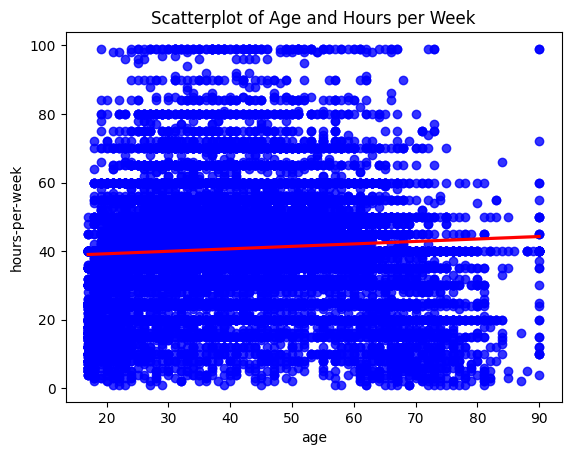

In [21]:
sns.regplot(data=adult, x="age", y="hours-per-week",line_kws={'color': 'red'},
           scatter_kws={'color': 'blue'})
plt.title("Scatterplot of Age and Hours per Week")
plt.show()

From the plot we can not really draw any conclusion or assumptions about the correlation or the variation. So we have to calculate pearsons correlation coefficient.

In [22]:
#Pearsons correlation coefficient
from scipy.stats import pearsonr
pearsonr(adult["age"], adult["hours-per-week"])

PearsonRResult(statistic=np.float64(0.07930635572175626), pvalue=np.float64(2.6388517429709017e-67))

In case there are missing values and we are using Scipy we have to remove them in order to have a correct calculation.Pandas is dropping missing values implicitly

From the plot we see that the data is higly scatterd, suggesting a lot of variation.

The pearson correlation coefficient is close to zero, indicating a very weak positive correlation between age and hours worked per week. This mean that as age increase, there is a very slight tendency for individuals to work more hours per week , but the effect is minimal, almost none.

The weak positive correlation suggest that older individuals may work slighlt more hours , but other factors likely have a much stronger influence.

## Variation one categorical and one numerical.

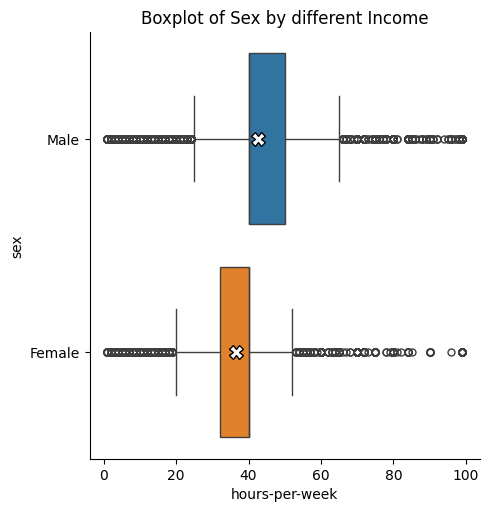

In [23]:
sns.catplot(x="hours-per-week", y="sex", hue="sex", data=adult, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})

plt.title("Boxplot of Sex by different Income")
plt.show()

The median work hours seems to be same around 40 hours per week for both males and females.

The interqueartile range suggests that females work from 30-40 hours per week while males work between 40 and 45 hours per week.

There are many outliers, for individuals working extreame hours, less than 20 or more than 60.

The overlapping distributions suggest that gender alone does not strongly determine hours worked.

Bottom line, the boxplots suggest minimal gender-based differences in working hours, but further exploration is needed.

As far as for the outliers, we can see that there many outliers for indiciduals working less than 20 hours and more than 60 hours per week. Noticable outliers are the ones for the female cateogory working more than 80 hours. Also, noticable is the fact that the spread of hours worked is slightly wider for males compared to females, indicating variability. 
In order to define what these outliers means and what conclusion we draw from these, we need to further explore the outliers, for matter like gender inequality, part-time jobs etc.